In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv("/Users/henryvuong/Downloads/movies.csv")


In [36]:
df[df.isnull().any(axis=1)]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [41]:
df = df.dropna()

In [42]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [43]:
df["votes"] = df["votes"].astype("int64")
df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [56]:
df['yearcorrect'] = df['released'].astype(str).str.split(',').str[1].str.split('(').str[0].str[1:5]

In [57]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [58]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


<Axes: xlabel='budget', ylabel='gross'>

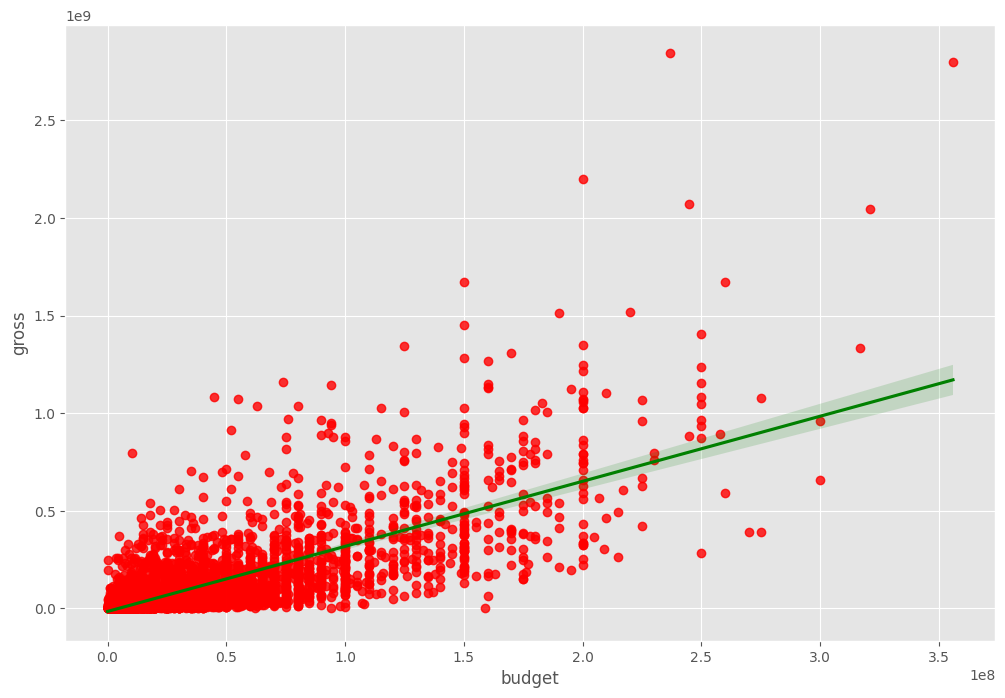

In [59]:
sns.regplot(x='budget',y ='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'green'})

In [64]:
df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


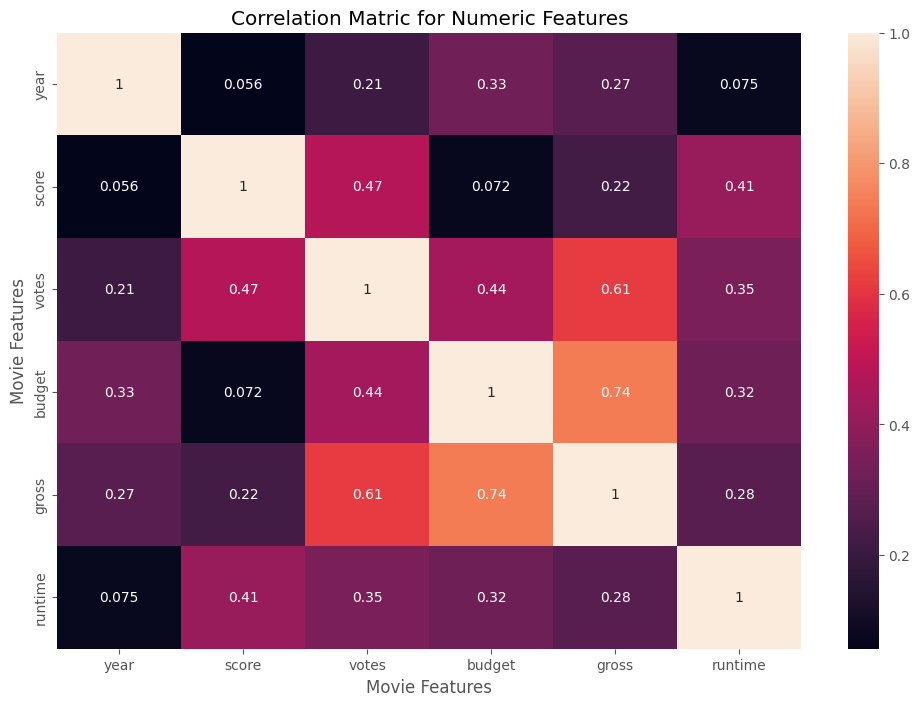

In [67]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [69]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

year     year       1.000000
         score      0.056386
         votes      0.206021
         budget     0.327722
         gross      0.274321
         runtime    0.075077
score    year       0.056386
         score      1.000000
         votes      0.474256
         budget     0.072001
         gross      0.222556
         runtime    0.414068
votes    year       0.206021
         score      0.474256
         votes      1.000000
         budget     0.439675
         gross      0.614751
         runtime    0.352303
budget   year       0.327722
         score      0.072001
         votes      0.439675
         budget     1.000000
         gross      0.740247
         runtime    0.318695
gross    year       0.274321
         score      0.222556
         votes      0.614751
         budget     0.740247
         gross      1.000000
         runtime    0.275796
runtime  year       0.075077
         score      0.414068
         votes      0.352303
         budget     0.318695
         gross

In [70]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year     score      0.056386
score    year       0.056386
budget   score      0.072001
score    budget     0.072001
year     runtime    0.075077
runtime  year       0.075077
year     votes      0.206021
votes    year       0.206021
gross    score      0.222556
score    gross      0.222556
year     gross      0.274321
gross    year       0.274321
         runtime    0.275796
runtime  gross      0.275796
budget   runtime    0.318695
runtime  budget     0.318695
year     budget     0.327722
budget   year       0.327722
votes    runtime    0.352303
runtime  votes      0.352303
         score      0.414068
score    runtime    0.414068
votes    budget     0.439675
budget   votes      0.439675
votes    score      0.474256
score    votes      0.474256
gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [71]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings